<a href="https://colab.research.google.com/github/Dannyteo/Dannyteo.github.io/blob/master/project5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/dataset/'  #change dir to your project folder

In [4]:
!curl https://raw.githubusercontent.com/torch/tutorials/master/7_imagenet_classification/synset_words.txt -o synset_words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31675  100 31675    0     0   128k      0 --:--:-- --:--:-- --:--:--  128k


In [5]:
import functools
from keras import backend as K
import tensorflow as tf
from tensorflow import metrics
import numpy as np
from sklearn.metrics import auc
from keras.models import Model
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import metrics
from keras.applications.vgg16 import VGG16

# note we exclude the final dense layers and add one back below, we would retrain it ourselves
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
 
 # Freeze convolutional layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

 # add on custom dense layers   
x = base_model.output
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
mat = Dense(6, activation='softmax', name='class')(x)

# compile model
model = Model(inputs=base_model.input, outputs=mat)
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.00001),
              metrics=[metrics.categorical_accuracy])

model.summary()


Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

BS=32

data_generator = ImageDataGenerator(rescale=1./255, 
#featurewise_center=True,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
#featurewise_std_normalization=True,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
validation_split=0.25)

train_generator = data_generator.flow_from_directory(
'gdrive/My Drive/dataset/train_set', 
target_size=(224, 224), 
shuffle=True, #seed=13,
class_mode='categorical', 
batch_size=BS, 
subset="training")

validation_generator = data_generator.flow_from_directory(
'gdrive/My Drive/dataset/train_set', 
target_size=(224, 224), 
shuffle=True, #seed=13,
class_mode='categorical', 
subset="validation")

# train model
model.fit_generator(
train_generator,
#steps_per_epoch=64, #len(train_generator)//BS,
epochs=50,
callbacks=[early_stopping],
validation_data=validation_generator, # optional - if used needs to be defined
validation_steps=16)


Found 1898 images belonging to 6 classes.
Found 629 images belonging to 6 classes.
Epoch 1/50
36/60 [=================>............] - ETA: 8:08 - loss: 1.7881 - categorical_accuracy: 0.2054

In [0]:
#How well does it do?
results = model.evaluate(train_generator)#, validation_generator) #, batch_size=128)
print('test loss:', results[0]*100)
print('test acc:', results[1]*100)

In [0]:
#save the model
#serialize model to json

model_json=model.to_json()
model.save_weight("model.h5")

In [0]:
model.save('gdrive/My Drive/model.h5')

In [7]:
ls 'gdrive/My Drive/model_recycle.h5'

'gdrive/My Drive/model_recycle.h5'


In [8]:
loaded_model = tf.keras.models.load_model('gdrive/My Drive/model_recycle.h5')
#loaded_model.layers[0].input_shape (None, 224, 224, 3)



Input your image's path to analyze: t1


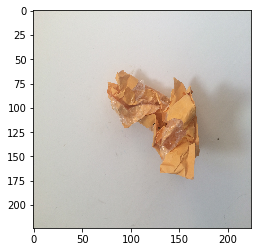

[3.8107345e-30 0.0000000e+00 2.1353077e-13 1.3359214e-19 4.7575877e-10
 1.0000000e+00]
Non-recyclable, trash


Input your image's path to analyze: t2


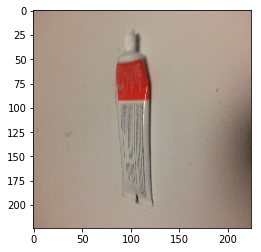

[2.9456452e-19 1.8331688e-20 6.3429720e-11 2.0654532e-22 5.7178816e-16
 1.0000000e+00]
Non-recyclable, trash


Input your image's path to analyze: t5


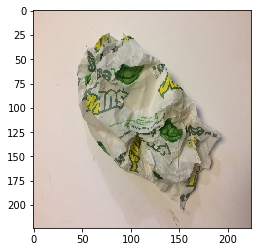

[0.0000000e+00 0.0000000e+00 4.9574721e-13 4.2276018e-23 1.0935415e-09
 1.0000000e+00]
Non-recyclable, trash


Input your image's path to analyze: pp5


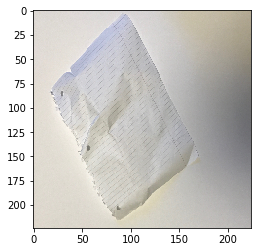

[5.41203152e-24 2.36679965e-36 1.05879684e-29 1.00000000e+00
 2.06589601e-13 4.75551243e-09]
Recyclable, paper


Input your image's path to analyze: p1


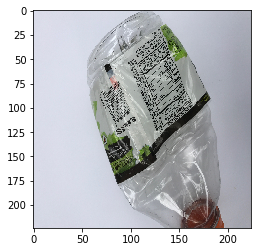

[0.0000000e+00 7.1140974e-21 1.3222248e-07 1.5524923e-36 9.9999952e-01
 3.4264187e-07]
Recyclable, plastic


Input your image's path to analyze: p4


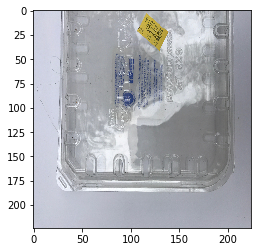

[0.0000000e+00 0.0000000e+00 5.4314619e-28 1.0000000e+00 6.7140852e-18
 2.4002447e-18]
Recyclable, paper


Input your image's path to analyze: p3


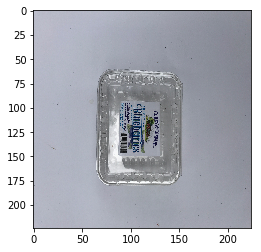

[0.0000000e+00 0.0000000e+00 5.7692414e-15 0.0000000e+00 1.0000000e+00
 3.5339271e-29]
Recyclable, plastic


Input your image's path to analyze: p2


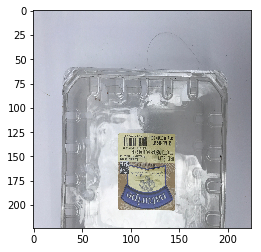

[0.0000000e+00 2.7240208e-25 7.9528920e-02 1.3818602e-21 9.2047107e-01
 0.0000000e+00]
Recyclable, plastic


Input your image's path to analyze: p5


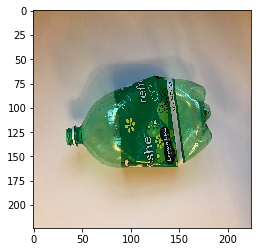

[0.0000000e+00 0.0000000e+00 1.2105886e-34 0.0000000e+00 1.0000000e+00
 3.4976808e-26]
Recyclable, plastic


Input your image's path to analyze: g2


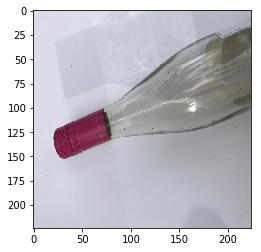

[0.000000e+00 1.000000e+00 7.053594e-37 0.000000e+00 0.000000e+00
 0.000000e+00]
Recyclable, glass


Input your image's path to analyze: g5


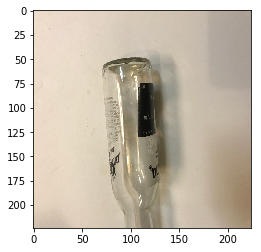

[0.000000e+00 1.000000e+00 5.614954e-15 0.000000e+00 0.000000e+00
 0.000000e+00]
Recyclable, glass


Input your image's path to analyze: g1


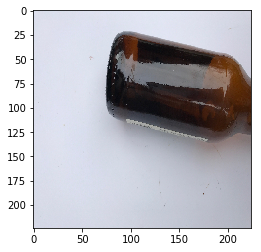

[0.0000000e+00 1.0000000e+00 1.4037467e-24 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
Recyclable, glass


Input your image's path to analyze: g2


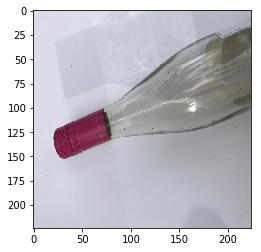

[0.000000e+00 1.000000e+00 7.053594e-37 0.000000e+00 0.000000e+00
 0.000000e+00]
Recyclable, glass


Input your image's path to analyze: g3


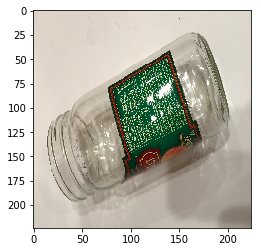

[0.0000000e+00 5.9973368e-05 9.9994004e-01 0.0000000e+00 1.7311558e-11
 0.0000000e+00]
Recyclable, metal


Input your image's path to analyze: g4


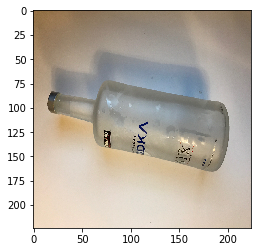

[0.000000e+00 1.000000e+00 5.106592e-28 0.000000e+00 4.382583e-30
 0.000000e+00]
Recyclable, glass




In [0]:
# Part 3 - Making new predictions
%matplotlib inline
import tensorflow as tf
from keras import backend as K
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
#from keras.models import predict_proba

#model=load_model('gdrive/My Drive/my_model.h5')
loaded_model = tf.keras.models.load_model('gdrive/My Drive/model_recycle.h5')
from keras.preprocessing import image

#Get input of image to test the saved model
test=''
#test1 = 'gdrive/My Drive/dataset/test_set/cardboard/cardboard330.jpg'
testing=1

while testing:
  print("\n")
  test=input("Input your image's path to analyze: ")
  test_image_path='gdrive/My Drive/data/'+test+'.jpg'
  test_image=image.load_img(test_image_path, target_size = (224, 224))
  plt.imshow(test_image)
  plt.show()

  
#test_image = image.load_img('gdrive/My Drive/dataset/test_set/glass/glass405.jpg', target_size = (224, 224))
#test_image = image.load_img('gdrive/My Drive/dataset/test_set/metal/metal329.jpg', target_size = (224, 224))
#test_image = image.load_img('gdrive/My Drive/dataset/test_set/paper/paper476.jpg', target_size = (224, 224))
#test_image = image.load_img('gdrive/My Drive/dataset/test_set/plastic/plastic433.jpg', target_size = (224, 224))
#test_image = image.load_img('gdrive/My Drive/dataset/test_set/trash/trash140.jpg', target_size = (224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = loaded_model.predict(test_image)

  print(result[0])
  x=str(result)
  text=x.split()
  text[0]=text[0].replace('[[','')
  text[5]=text[5].replace(']]','')

  if float(text[0])>0.9 and float(text[2])<1.1:
    predict="Recyclable, cardboard"
  elif float(text[1])>0.9 and float(text[2])<1.1:
    predict="Recyclable, glass"
  elif float(text[2])>0.9 and float(text[2])<1.1:
    predict="Recyclable, metal"
  elif float(text[3])>0.9 and float(text[2])<1.1:
    predict="Recyclable, paper"
  elif float(text[4])>0.9 and float(text[2])<1.1:
    predict="Recyclable, plastic"
  elif float(text[5])>0.9 and float(text[2])<1.1:
    predict="Non-recyclable, trash"
  else:
    predict="No conclusion. Out of scope. "

  print(predict)

  #test_again=input("Test another image? Y/N: ")
  #if test_again == 'Y':
  testing=1
  test_image_path=''
  #else:
   # testing=0
    #print('Thank you for testing. Have a nice day!')


In [0]:
x=str(result)
text=x.split()
print(text)

text[0]=text[0].replace('[[','')
text[5]=text[5].replace(']]','')
text[5]
text

['[[0.', '0.', '1.', '0.', '0.', '0.]]']


['0.', '0.', '1.', '0.', '0.', '0.']

In [0]:
x=str(result)
text=x.split()
print(text)
text[0]=text[0].replace('[[','')
text[5]=text[5].replace(']]','')
text[5]
text
if float(text[0])>0.99 and float(text[2])<1.01:
  predict="cardboard, recyclable"
elif float(text[1])>0.99 and float(text[2])<1.01:
  predict="glass, recyclable"
elif float(text[2])>0.99 and float(text[2])<1.01:
  predict="metal, recyclable"
elif float(text[3])>0.99 and float(text[2])<1.01:
  predict="paper, recyclable"
elif float(text[4])>0.99 and float(text[2])<1.01:
  predict="plastic, recyclable"
else:# float(text[5])>0.99 and float(text[2])<1.01:
  predict="non-recyclable"

print(predict)

['[[0.0000000e+00', '4.5999724e-38', '1.0000000e+00', '0.0000000e+00', '0.0000000e+00', '0.0000000e+00]]']
metal, recyclable


In [0]:
# Part 3 - Making new predictions
import numpy as np
from keras.models import load_model
#from keras.models import predict_proba

#model=load_model('gdrive/My Drive/my_model.h5')
loaded_model = tf.keras.models.load_model('gdrive/My Drive/model_recycle.h5')
from keras.preprocessing import image

test_image = image.load_img('gdrive/My Drive/dataset/test_set/cardboard323.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
print(result[0])
#type(result)
#predict_proba(self, x, batch_size=32, verbose=1)
#train_generator.class_indices

x=str(result)
text=x.split()
print(text)
text[0]=text[0].replace('[[','')
text[5]=text[5].replace(']]','')
text[5]
text
if float(text[0])>0.99 and float(text[2])<1.01:
  predict="cardboard, recyclable"
elif float(text[1])>0.99 and float(text[2])<1.01:
  predict="glass, recyclable"
elif float(text[2])>0.99 and float(text[2])<1.01:
  predict="metal, recyclable"
elif float(text[3])>0.99 and float(text[2])<1.01:
  predict="paper, recyclable"
elif float(text[4])>0.99 and float(text[2])<1.01:
  predict="plastic, recyclable"
elif float(text[5])>0.99 and float(text[2])<1.01:
  predict="non-recyclable"
else:
  predict="Sorry. Not conclusive. Out of scope. "

print(predict)

FileNotFoundError: ignored

In [0]:
!pip install tensorflowjs 

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 17.3MB 7.9MB/s 
     |████████████████████████████████| 81kB 25.3MB/s 
     |████████████████████████████████| 317kB 43.4MB/s 
     |████████████████████████████████| 256kB 43.3MB/s 
     |████████████████████████████████| 890kB 37.3MB/s 
     |████████████████████████████████| 655kB 37.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=f5be961abc06664c91279e2a8fb6158c6076ab748b3b589db58171bc0feb0dc8
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
  Created wheel for regex: filename=regex-2019.8.19-cp36-cp36m-linux_x86_64.whl size=609233 sha256=23424a973fbb316b899c2dd8d599cc5bbefc27c34c9e4abe8e25b8cb498d2327
  Stored in directory: /root/.cache/pip/wheels/90/04/07/b5010fb816721eb3d6dd64ed5cc8111ca23f97fdab8619b5be
Successfully built PyInquirer regex
ERROR: google-colab 1.0.0 has requirem

In [0]:
#!mkdir model_recycle
!tensorflowjs_converter --input_format keras model_recycle.h5 model_recycle/

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 6, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/__init__.py", line 24, in <module>
    from tensorflowjs.converters.tf_saved_model_conversion_v2 import convert_tf_saved_model
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/tf_saved_model_conversion_v2.py", line 41, in <module>
    from tensorflowjs.converters import fuse_prelu
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/fuse_prelu.py", line 200, in <module>
    register_prelu_op()
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/fuse_prelu.py", line 42, in register_prelu_op
    value.list.type.extend([types_pb2.DataType.DT_FLOAT])
AttributeError: 'Enu

In [0]:
!zip -r model.zip model_recycle/

updating: model_recycle/ (stored 0%)


In [0]:
from google.colab import files
files.download('model.zip')

In [0]:
# evaluate the model
scores = model.evaluate(Validation_data, mat, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("my_model.h5")
print("Saved my_model to disk")

NameError: ignored

In [0]:
!ls '/content/gdrive/My Drive'

In [0]:
scores = model.evaluate(train_generator)
print(scores[1]*100)

28/28 [==============================] - 151s 5s/step
79.31662338545861
